In [1]:
import pandas as pd
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import *
%matplotlib inline



# Step 1: Ask
## It’s impossible to solve a problem if you don’t know what it is. These are some things to consider:

#### Define the problem you’re trying to solve 

Do I need a masters to be a data scientist? Does this answer satisfy:

### A better more specific question would be:
How does education level, number of intership and research posotions, and work experience affect my chances of landing a data science job. 


#### Make sure you fully understand the stakeholder’s expectations

The stake holders in this case are myself, and other berkeley data science students, and I want to provide information so we can make a informed decision on where to alocate our time, money, and focus, in order to land a data science position. 

#### Focus on the actual problem and avoid any distractions
#### Collaborate with stakeholders and keep an open line of communication
#### Take a step back and see the whole situation in context

In [2]:
pip install matplotlib-venn

Processing ./.cache/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa/matplotlib_venn-0.11.6-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


# Step 2: Prepare 
You will decide what data you need to collect in order to answer your questions and how to organize it so that it is useful. You might use your business task to decide: 

#### What metrics to measure
I want to measure common metrics among data scientists including level of education,previous job experience, internships, research experience etc. 
#### Locate data in your database
I used an application called "Linked Helper", which can be used to scrape LinkedIn profile data. I searched "Data Scientist" under "People" and scraped the first 798 profiles. 

Link to application: https://www.linkedhelper.com
#### Create security measures to protect that data
## Questions to ask yourself in this step: 
#### What do I need to figure out how to solve this problem?
To solve this problem, I want to quantify the uncertinaty of the different paths to become a data scientist, to make an informed data driven decision. For example, I noticed that 40% of data scientists have had experience as analysts or jobs related to analytics. Therefore becoming an analyst first, and transitioning into data science could be another valid, but cheaper path. 
#### What research do I need to do?

I would like to build a joint distrubtion or conditional probability tree, to see how degree level, internships, and work experience affects the chance of landing a data science job. Therefore I need to figure out first what statistical method I could use to obtain the results I want, and figure out the dependence of my data. 

In [3]:
# all_data = Table().read_table("LinkedIn_scraped_data_jupyter.csv")
# all_data.show(2)

# The Data:

In [4]:
all_data = Table().read_table("ALL_scraped_data_update.csv")
all_data.show(2)

id,public_id,hash_id,member_id,sn_member_id,sn_hash_id,r_member_id,t_hash_id,lh_id,profile_url,email,full_name,first_name,last_name,original_first_name,original_last_name,custom_first_name,custom_last_name,avatar,headline,location_name,industry,summary,address,birthday,badges_premium,badges_influencer,badges_job_seeker,badges_open_link,current_company,current_company_custom,current_company_position,current_company_custom_position,organization_1,organization_id_1,organization_url_1,organization_title_1,organization_start_1,organization_end_1,organization_description_1,organization_location_1,organization_website_1,organization_domain_1,organization_2,organization_id_2,organization_url_2,organization_title_2,organization_start_2,organization_end_2,organization_description_2,organization_location_2,organization_website_2,organization_domain_2,organization_3,organization_id_3,organization_url_3,organization_title_3,organization_start_3,organization_end_3,organization_description_3,organization_location_3,organization_website_3,organization_domain_3,organization_4,organization_id_4,organization_url_4,organization_title_4,organization_start_4,organization_end_4,organization_description_4,organization_location_4,organization_website_4,organization_domain_4,organization_5,organization_id_5,organization_url_5,organization_title_5,organization_start_5,organization_end_5,organization_description_5,organization_location_5,organization_website_5,organization_domain_5,organization_6,organization_id_6,organization_url_6,organization_title_6,organization_start_6,organization_end_6,organization_description_6,organization_location_6,organization_website_6,organization_domain_6,organization_7,organization_id_7,organization_url_7,organization_title_7,organization_start_7,organization_end_7,organization_description_7,organization_location_7,organization_website_7,organization_domain_7,organization_8,organization_id_8,organization_url_8,organization_title_8,organization_start_8,organization_end_8,organization_description_8,organization_location_8,organization_website_8,organization_domain_8,organization_9,organization_id_9,organization_url_9,organization_title_9,organization_start_9,organization_end_9,organization_description_9,organization_location_9,organization_website_9,organization_domain_9,organization_10,organization_id_10,organization_url_10,organization_title_10,organization_start_10,organization_end_10,organization_description_10,organization_location_10,organization_website_10,organization_domain_10,education_1,education_degree_1,education_fos_1,education_start_1,education_end_1,education_description_1,education_2,education_degree_2,education_fos_2,education_start_2,education_end_2,education_description_2,education_3,education_degree_3,education_fos_3,education_start_3,education_end_3,education_description_3,education_4,education_degree_4,education_fos_4,education_start_4,education_end_4,education_description_4,education_5,education_degree_5,education_fos_5,education_start_5,education_end_5,education_description_5,education_6,education_degree_6,education_fos_6,education_start_6,education_end_6,education_description_6,education_7,education_degree_7,education_fos_7,education_start_7,education_end_7,education_description_7,education_8,education_degree_8,education_fos_8,education_start_8,education_end_8,education_description_8,education_9,education_degree_9,education_fos_9,education_start_9,education_end_9,education_description_9,education_10,education_degree_10,education_fos_10,education_start_10,education_end_10,education_description_10,language_1,language_proficiency_1,language_2,language_proficiency_2,language_3,language_proficiency_3,languages,skills,twitters,phone_1,phone_type_1,phone_2,phone_type_2,messenger_1,messenger_provider_1,messenger_2,messenger_provider_2,website_1,website_2,website_3,tags,connected_at,mutual_count,mutual_first_fullname,mutual_second_fullname,original_mutual_first_fullname,original_mutual_second_fullname,custo

In [5]:
copy = all_data

In [6]:
# location_name_data = all_data
# location_name_data.group("location_name").sort("count", descending=True).show(3)

# Step 3: Process
Clean data is the best data and you will need to clean up your data to get rid of any possible errors, inaccuracies, or inconsistencies. This might mean:

#### Using spreadsheet functions to find incorrectly entered data 
#### Using SQL functions to check for extra spaces
#### Removing repeated entries 
#### Determining if your data is biased 
## Questions to ask yourself in this step: 
#### What data errors or inaccuracies might get in my way of getting the best possible answer to the problem I am trying to solve?
#### How can I clean my data so the information I have is more consistent?

# Cleaning the Data:
After scraping the data, I did some cleaning in Google sheets, bellow I do some additional cleaning, specifically making new columns to indicate if a data scientist has a master's or above, and if they went to Berkeley. 

# Step 4: Analyze 
You will want to think analytically about your data. At this stage, you might sort and format your data to make it easier to: 

#### Perform calculations
In this step I do the EDA. I formatted the data, and did some filtering functions to extract useful information like number of pervious internship positions, and if the level of education the data scientist had. 
#### Combine data from multiple sources
#### Create tables with your results
## Questions to ask yourself in this step:
#### What story is my data telling me?
So far the data has told me a majority of data scientists have masters degree; however, more intrestingly 40% of the data scientists in the sample have had job experience related to data analysis, or analytics. This is very intresting because that finding could create a new path for myself and other students to get into the field, that is possibly cheaper. 
#### How will my data help me solve this problem?
The data shows what experience data scientists have, and also a timeline of how they got there. Therefore the data can tell a story of almost 800 data scientists and how they got there job.  
#### Who needs my company’s product or service? What type of person is most likely to use it?
I will use the data analysis to make a data driven decision about the path I or someone else might take to become a data scientist. 

In [7]:
terms_for_grad_degrees = make_array("Master", "Doctor", "PHD", "PhD", "M.Eng", "M.S.E.",
                                   "MS in Data Science & Information", "postdoc", "Ph.D.",
                                   "Post Graduate Diploma", "M.Sc.", "MSc.", "PhD Student",
                                   "MSc", "Master's", "Doctor of Philosophy (Ph.D.)", 
                                   "Master of Science - MS", "Postdoc", "Graduate Coursework", 
                                    "Ph.D Candidate", "MIMS", "MIDS", "M.A.", "MS","MA",
                                   "Postgraduate", "Магистр", "碩士", "Аспирант",   )


In [8]:
terms_for_analyst_exp = make_array("Analyst", "Analytics", "Analysis")

In [9]:
def contains_analyst_position(string):
    for each_term in terms_for_analyst_exp:
        if each_term in string:
            return 1
    else:
        return 0

In [10]:
analyst_exp1 = copy.select("organization_title_1").apply(contains_analyst_position, "organization_title_1")
analyst_exp2 = copy.select("organization_title_2").apply(contains_analyst_position, "organization_title_2")
analyst_exp3 = copy.select("organization_title_3").apply(contains_analyst_position, "organization_title_3")
analyst_exp4 = copy.select("organization_title_4").apply(contains_analyst_position, "organization_title_4")
analyst_exp5 = copy.select("organization_title_5").apply(contains_analyst_position, "organization_title_5")
analyst_exp6 = copy.select("organization_title_6").apply(contains_analyst_position, "organization_title_6")

analyst_array = analyst_exp1 + analyst_exp2 + analyst_exp3 + analyst_exp4 + analyst_exp5 + analyst_exp6
np.count_nonzero(analyst_array)

324

In [11]:
all_data = all_data.with_column("Analyst_Experience", analyst_array)
copy = all_data

In [12]:
def contains_grad_school(string):
    for each_term in terms_for_grad_degrees:
        if each_term in string:
            return 1
    else:
        return 0

In [13]:
terms_for_interships_or_research = make_array("Intern", "Research", "Internship", "Junior", 
                                              "Jr", "researcher")

In [14]:
def contains_inter_or_research(string):
    for each_term in terms_for_interships_or_research:
        if each_term.lower() in string.lower():
            return 1
    else:
        return 0

In [15]:
intern_exp1 = copy.select("organization_title_1").apply(contains_inter_or_research, "organization_title_1")
intern_exp2 = copy.select("organization_title_2").apply(contains_inter_or_research, "organization_title_2")
intern_exp3 = copy.select("organization_title_3").apply(contains_inter_or_research, "organization_title_3")
intern_exp4 = copy.select("organization_title_4").apply(contains_inter_or_research, "organization_title_4")
intern_exp5 = copy.select("organization_title_5").apply(contains_inter_or_research, "organization_title_5")
intern_exp6 = copy.select("organization_title_6").apply(contains_inter_or_research, "organization_title_6")

num_internships_research = intern_exp1 +intern_exp2 + intern_exp3 + intern_exp4 + intern_exp5 + intern_exp6

all_data = all_data.with_column("Internships_and_Research", num_internships_research)

copy = all_data

In [16]:
berk_key_words = make_array("Berkeley", "Cal", "MIDS", "MIMS")

def contains_berkeley_school(string):
    for each_term in berk_key_words:
        if each_term in string:
            return 1
    else:
        return 0

In [17]:
contains_berk1 = copy.select("education_1").apply(contains_berkeley_school, "education_1")
contains_berk2 = copy.select("education_2").apply(contains_berkeley_school, "education_2")
contains_berk3 = copy.select("education_3").apply(contains_berkeley_school, "education_3")
berkeley_alum = (contains_berk1 + contains_berk2 + contains_berk3) > 0
all_data = all_data.with_column("Went_to_Berkeley", berkeley_alum)
copy = all_data

In [18]:
# Here I am applying the function which goes through each column that describes the level of education
# that the data scientist has. There are 6 columns for degrees. Yes there are some very qualified 
# people in the sample with 6 degrees. 

ed_degree_1 = copy.select("education_degree_1").apply(contains_grad_school, "education_degree_1")
ed_degree_2 = copy.select("education_degree_2").apply(contains_grad_school, "education_degree_2")
ed_degree_3 = copy.select("education_degree_3").apply(contains_grad_school, "education_degree_3")
ed_degree_4 = copy.select("education_degree_4").apply(contains_grad_school, "education_degree_4")
ed_degree_5 = copy.select("education_degree_5").apply(contains_grad_school, "education_degree_5")
ed_degree_6 = copy.select("education_degree_6").apply(contains_grad_school, "education_degree_6")

# Here I sum up all the arrays. If the arrays sum up to 0 that means that none of the columns contained
# any of the key words that I chose that describe graduate degrees, and therefore, that data scientists
# does not have a graduate degree. 

num_degress = ed_degree_1 + ed_degree_2 + ed_degree_3 +ed_degree_4 + ed_degree_5 + ed_degree_6
number_of_data_scientists_with_grad_school = np.count_nonzero(num_degress > 0)

In [19]:
has_masters_or_higher = num_degress > 0

# Here I am adding a new column that has a boolean value whether the data scientist has a graduate degree or not

all_data = all_data.with_column("Masters", has_masters_or_higher)
copy = all_data

In [20]:
# Bellow are some numbers crunched with self explanatory titles, which I used to create the Venn Diagram
# and some summary stats. 

number_of_data_scientists_in_table = len(all_data.column(0))
number_of_DS_no_degree = len(copy.where("education_1", "nan").where("education_2", "nan").column(0))
number_ds_bachelors_and_above = number_of_data_scientists_in_table - number_of_DS_no_degree
porportion_ds_grad = number_of_data_scientists_with_grad_school / number_of_data_scientists_in_table

number_of_data_scientists_with_grad_school, number_of_data_scientists_in_table, number_of_DS_no_degree, porportion_ds_grad


(629, 798, 4, 0.7882205513784462)

In [21]:
(798 - 629) / 794

0.2128463476070529

### The total number of Data Scientists in the sample is 798
### Aproximately 79%(629) have a graduate degree or higher. 
### Aproximately 99% (794) have a bachelors degree or higher
### Aproximately 21% (169) have only a bachelors degree 

In [22]:
# p(bachelors) = 794 / 798
# p(bachelors and master) = 546 / 794 
# p(masters) = 794 - 546 / 794

Text(0.5, 1.0, 'Data Scientist Education Level')

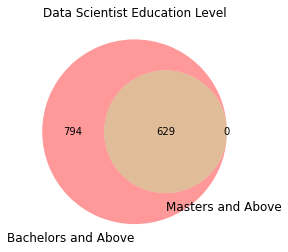

In [23]:
from matplotlib_venn import venn2
venn2(subsets = (794,0,(629)), set_labels = ('Bachelors and Above', 'Masters and Above'))
plt.title("Data Scientist Education Level")


In [24]:
# from matplotlib_venn import venn3
# venn3(subsets = (1, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))

In [25]:
no_masters_all = copy.with_column("Masters", num_degress).where("Masters", 0)

In [26]:
no_masters = copy.with_column("Masters", num_degress).where("Masters", 0).select("Masters","current_company","current_company_position","education_1","education_degree_1",
                                                                                 "education_fos_1","education_degree_2","education_degree_3", "Went_to_Berkeley",
                                                                                "Internships_and_Research")
len(no_masters.column(0))

169

In [27]:
# Bellow are some summary stats about spefically berkeley students. The orignal table
# Now has columns named "Masters", and "Went_to_Berkeley" which both have boolean values
# to indicate these things. 

went_to_berk_no_masters = len(no_masters.where("Went_to_Berkeley", True).column(0))
went_to_berk_total = len(copy.where("Went_to_Berkeley", True).column(0))
(went_to_berk_no_masters / went_to_berk_total), went_to_berk_no_masters, went_to_berk_total

(0.19480519480519481, 60, 308)

In [28]:
masters_vs_no_mast = copy.select("Masters", "Went_to_Berkeley").group(["Went_to_Berkeley", "Masters"])
masters_vs_no_mast

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Went_to_Berkeley,Masters,count
False,False,109
False,True,381
True,False,60
True,True,248


In [29]:
# masters_vs_no_mast.where("Went_to_Berkeley", True).select("count","Masters").barh("Masters")

In [30]:
# masters_vs_no_mast.where("Went_to_Berkeley", False).select("count","Masters").barh("Masters")

In [31]:
(60 / 308), (109 / 490)

(0.19480519480519481, 0.22244897959183674)

# Finding:
### 19% of UC Berkeley Students got jobs as data scientists without a masters.
### 22% of Non Berkeley students got jobs as data scientists without a masters.

## Consideration:
The sample that I collected has 38% of the data scientists as UC Berkeley Alumni. This is clearly not a representative sample of the population of all data scientists. I beileve this bias arose because my search resulsts on linked in have been skewed due to a page ranking algorithm which clearly prioritizes berkeley alumni.However, this data can still be useful to answer the question if I should get a masters degree. 

### Companies with the most Data Scientists in the sample. 

In [32]:
masters_porportions_big_tech = make_array(12,8,8,6, 7, 3)

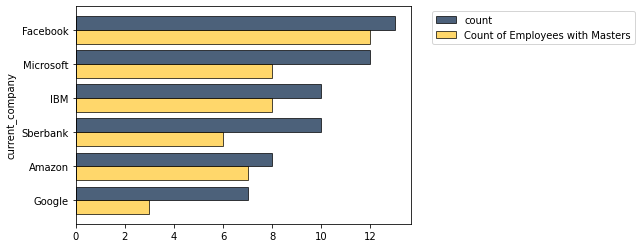

In [35]:
big_tech_counts = copy.group("current_company").sort("count", descending=True).where("count", are.above(5)).with_column("Count of Employees with Masters",masters_porportions_big_tech )
big_tech_counts.barh("current_company")

In [36]:
IBM_DS = copy.where("current_company", "IBM").select("current_company","current_company_position", "education_degree_1", "education_fos_1","education_fos_2")
IBM_DS.show(4)

current_company,current_company_position,education_degree_1,education_fos_1,education_fos_2
IBM,Data Scientist,Bachelor's degree,"Political Economy, Minor in Data Science",Economics
IBM,Incoming Associate Data Scientist,Master's degree,Data Science,nan
IBM,Data Scientist/Software Developer,Master of Science - MS,Business Analytics,Auditing(IAEP)
IBM,Senior Data Scientist,Master of Science (M.S.),Operation Research,Financial Engineering


### Bellow are the most popular graduate degrees among Data Scientists.

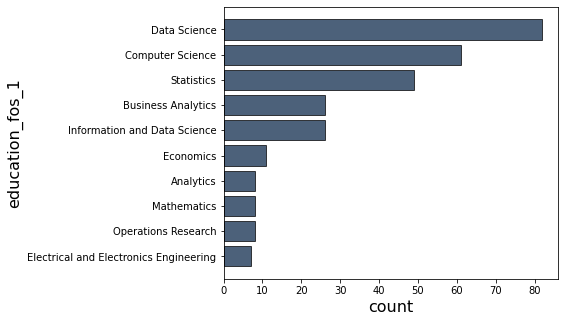

In [37]:
popular_grad_degrees = copy.select("education_fos_1").group("education_fos_1").sort("count", descending=True).where("education_fos_1", are.not_equal_to("nan"))
popular_grad_degrees.where("count", are.above(6)).barh("education_fos_1")

### Bellow are the 169 Data Scientists in the sample without a Masters or Higher.

In [38]:
no_masters.show(5)

Masters,current_company,current_company_position,education_1,education_degree_1,education_fos_1,education_degree_2,education_degree_3,Went_to_Berkeley,Internships_and_Research
0,Instagram,Data Scientist,The University of Texas at Austin - Red McCombs School o ...,Bachelor of Business Administration (B.B.A.),Management Information Systems,nan,nan,False,4
0,Snap Inc.,Data Scientist,"University of California, Berkeley",Bachelor of Arts,"Statistics, Chinese minor",nan,nan,True,1
0,Slack,Senior Data Scientist,Y Combinator,Summer 16,nan,Bachelor of Science in Engineering (BSE),nan,False,0
0,Adobe,Data Scientist (AEP) & Technical Consultant (AA),University of Melbourne,Bachelor's degree,"Applied Mathematics, Computer Science",Bachelor's degree,Bachelor's,True,0
0,Kinetic Eye,Data Scientist,"University of California, Berkeley",Bachelor of Arts - BA,Data Science,nan,nan,True,1


In [57]:
len(no_masters.where("Internships_and_Research", 0).column(0))

63

In [58]:
63 / 169

0.3727810650887574

In [59]:
(169 - 63) / 169

0.6272189349112426

In [61]:
((169 - 63) / 169) - (63 / 169)

0.2544378698224852

### IBM has the highest percent of Data Scientists without a masters degree with 40%. 

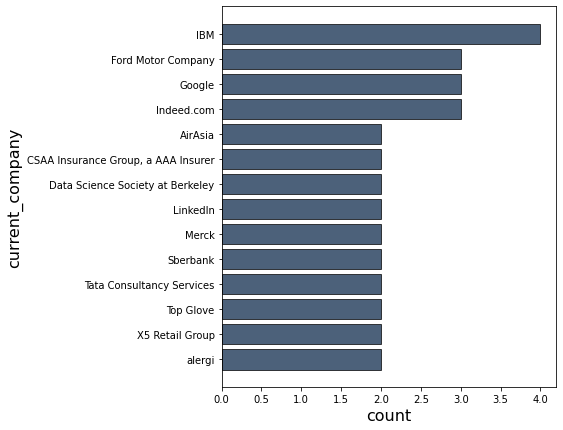

In [39]:
no_masters.group("current_company").sort("count", descending=True).where("count", are.above(1)).barh("current_company")

In [40]:
terms_for_CS = make_array("Computer", "Electrical", "Machine", "Software")
terms_for_Math_stats = make_array("Math", "Statistics", "Stats", "Mathematical","Physics","Computational")
def contains_CS(string):
    for each_term in terms_for_CS:
        if each_term in string:
            return 1
    else:
        return 0

In [41]:
  def contains_Math(string):
    for each_term in terms_for_Math_stats:
        if each_term in string:
            return 1
    else:
        return 0

In [42]:
has_CS1 = no_masters.select("education_fos_1").apply(contains_CS, "education_fos_1")
has_Math = no_masters.select("education_fos_1").apply(contains_Math, "education_fos_1")
np.count_nonzero((has_CS1) > 0), np.count_nonzero((has_Math) > 0)

(48, 34)

### The most popular major for the Data Scientists who dont have master degrees are Computer Science or related to Computer Science. 

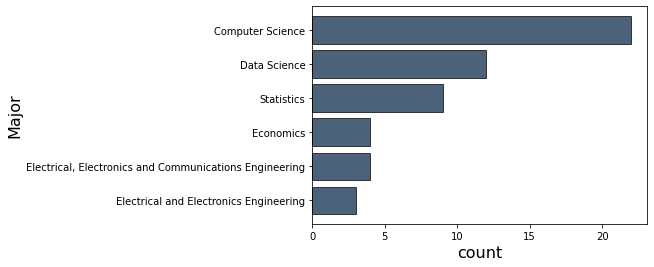

In [43]:
pop_undergrad_majors = no_masters.group("education_fos_1").sort("count", descending=True).where("education_fos_1", are.not_equal_to("nan"))
pop_undergrad_majors = pop_undergrad_majors.where("count", are.above(2))
pop_undergrad_majors = pop_undergrad_majors.with_column("Major",pop_undergrad_majors.column("education_fos_1"))
pop_undergrad_majors.drop("education_fos_1").barh("Major")

In [44]:
np.count_nonzero(no_masters.select("Internships_and_Research").column(0)) / len(no_masters.select("Internships_and_Research").column(0))

0.6272189349112426

# Finding: 62% of data scientists without masters have had internships and or research experience

In [45]:
np.count_nonzero(copy.where("Internships_and_Research",are.above(0)).where("Masters", are.above(0)).column("Internships_and_Research")) / len(copy.select("Internships_and_Research").where("Internships_and_Research", are.above(0)).column(0))

0.7725321888412017

# Finding: 77% of data scientists with masters have had internships and or research experience.

In [46]:
copy.select("organization_title_1", "organization_title_2", 
           "organization_title_3", 
           "organization_title_4", 
           "organization_title_5", 
           "organization_title_6",
           "Internships_and_Research",
           "Masters").where("Internships_and_Research",0).where("Masters", 0).where("organization_title_2", "nan").show()

organization_title_1,organization_title_2,organization_title_3,organization_title_4,organization_title_5,organization_title_6,Internships_and_Research,Masters
Data Scientist,nan,nan,nan,nan,nan,0,False
Data Scientist,nan,nan,nan,nan,nan,0,False
"Data Scientist, Team Leader",nan,nan,nan,nan,nan,0,False
Python Data Scientist,nan,nan,nan,nan,nan,0,False
"Data Scientist, Product Analytics",nan,nan,nan,nan,nan,0,False


# Finding: There are only 5 data scientists in the sample who have no masters degree, internships, work or research experience.

#### This table bellow is a beautiful representation of those who have no masters degrees, and started in data analaytics, and progressed into data science:

In [47]:
analyst_table = copy.select("organization_title_1", "organization_title_2", 
           "organization_title_3", 
           "organization_title_4", 
           "organization_title_5", 
           "organization_title_6",
           "Internships_and_Research",
           "Masters", "Analyst_Experience").where("Masters", False).where("Analyst_Experience", are.above(0))
analyst_table

organization_title_1,organization_title_2,organization_title_3,organization_title_4,organization_title_5,organization_title_6,Internships_and_Research,Masters,Analyst_Experience
Data Scientist,Product Science Intern,Data Science Intern,Analytics Intern,Marketing Associate,Marketing Analytics Intern,4,False,2
Data Scientist (AEP) & Technical Consultant (AA),Data Scientist & NIH Fellow,Resident Assistant,Data Science Consultant,Campus Ambassador,Data Analyst,0,False,1
Data Scientist,Data Science Intern,Desktop Consultant,Project Manager for Data Science Society at Berkeley,Shift Supervisor and Student Tech Consultant,Data Analytics Student Consultant,1,False,1
Data Scientist,Product Analyst,Associate Product Analyst,Data Science Intern,Product Analyst Intern,nan,2,False,3
Data Scientist,Data Scientist,Data Science Intern,e-4P 'Chief of Staff' & Data Analyst Intern,Marketing and Data Analyst Intern,Student Consultant,3,False,2
Lynx Data Scientist,Data Analyst,Business Analyst Intern,Research Assistant,Administrative Assistant,Server,2,False,2
Data Scientist,Support Operations Analyst,Senior Support Operations Specialist,Media Analyst & Account Manager,Resident Assistant,Research Assistant,1,False,2
Data Scientist,Data Analyst,Advanced Analytics Analyst (Intern),Associate Marketing Operations Manager (Intern),Strategic Markets Analyst (Intern),Assistant Product Manager Intern,4,False,3
Senior Data Scientist,Data Scientist,Senior Data Scientist,Data Analyst - Custom Analytics (Telecom/Technology Vert ...,Research Analyst,nan,1,False,2
Data Scientist,"Global Data, Insights & Analytics Intern",Student Programming Instructor,Student Assistant,Data Analytics Intern,nan,2,False,2


In [48]:
len(analyst_table.column(0)) / 169

0.3136094674556213

# Finding: 31% of data scientists without masters degrees have previous experience as data analysts or some other form of analyst position. 

In [49]:
len(copy.where("Analyst_Experience", are.above(0)).column(0)) / 798

0.40601503759398494

# Finding: 40% of data scientists have previous experience as data analysts or some other form of analyst position. 

In [50]:
ucb_ds_students_no_masters = copy.where("Went_to_Berkeley", True).where("Masters", False).select("education_fos_1").group("education_fos_1")
ucb_ds_students_no_masters.where("education_fos_1", "Data Science")

education_fos_1,count
Data Science,8


In [51]:
ucb_ds_students_no_masters = copy.where("Went_to_Berkeley", True).where("Masters", True).select("education_fos_1").group("education_fos_1")
ucb_ds_students_no_masters.where("education_fos_1", "Data Science")

education_fos_1,count
Data Science,49


In [52]:
8 / 49

0.16326530612244897

# Finding: 16% of UCB data science students landed data science roles without masters 

In [ ]:
# given only bachelors prob of data science job

In [ ]:
# predictive function


# number_of_internships = int 
# degree_level = string
# analyst_experience = boolean


def given_you_have(number_of_internships, degree_level, analyst_experience):
    new_table = copy.where("Internships_and_Research", are.bellow_or_equal_to(number_of_internships))
    
    

# Step 5: Share
Everyone shares their results differently so be sure to summarize your results with clear and enticing visuals of your analysis using data viz tools like graphs or dashboards. This is your chance to show the stakeholders you have solved their problem and how you got there. Sharing will certainly help your team:  

#### Make better decisions
#### Make more informed decisions
#### Lead to stronger outcomes
#### Successfully communicate your findings
## Questions to ask yourself in this step:
#### How can I make what I present to the stakeholders engaging and easy to understand?
I want to create a dashboard or powerpoint with these findings
#### What would help me understand this if I were the listener?

# Step 6: Act
Now it’s time to act on your data. You will take everything you have learned from your data analysis and put it to use. This could mean providing your stakeholders with recommendations based on your findings so they can make data-driven decisions.

## Questions to ask yourself in this step:
#### How can I use the feedback I received during the share phase (step 5) to actually meet the stakeholder’s needs and expectations?
These six steps can help you to break the data analysis process into smaller, manageable parts, which is called structured thinking. This process involves four basic activities:

#### Recognizing the current problem or situation
#### Organizing available information 
#### Revealing gaps and opportunities
#### Identifying your options